<h1>BEERS<h1>
    <img src="https://ocdn.eu/images/pulscms/ODY7MDA_/2c02c22677096c5ba6b2e6c006ef8708.jpeg" width="500"/>

<ul>
 <li>Which brewery produces the strongest beers by abv ?</li>
 <li>If you had to pick 3 beers to recommend to someone, how would you approach the problem ?</li>
 <li>What are the factors that impacts the quality of beer the most ?</li>
 <li>I enjoy a beer which aroma and appearance matches the beer style. What beer should I buy ?</li>   
 </ul>

Source: https://data.world/socialmediadata/beeradvocate

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('beer_reviews.csv') #odzczyt pliku lokalnie z katalogu gdzie mam notatnik

In [3]:
data.columns

Index(['brewery_id', 'brewery_name', 'review_time', 'review_overall',
       'review_aroma', 'review_appearance', 'review_profilename', 'beer_style',
       'review_palate', 'review_taste', 'beer_name', 'beer_abv',
       'beer_beerid'],
      dtype='object')

In [4]:
len(data)

1586614

In [5]:
data.head(5)

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883


In [6]:
data[['review_overall','review_aroma','review_appearance','review_palate','review_taste','beer_abv']].describe().T

,count,mean,std,min,25%,50%,75%,max
review_overall,1586614.0,3.815581,0.720622,0.00,3.5,4.0,4.5,5.0
review_aroma,1586614.0,3.735636,0.697617,1.00,3.5,4.0,4.0,5.0
review_appearance,1586614.0,3.841642,0.616093,0.00,3.5,4.0,4.0,5.0
review_palate,1586614.0,3.743701,0.682218,1.00,3.5,4.0,4.0,5.0
review_taste,1586614.0,3.792860,0.731970,1.00,3.5,4.0,4.5,5.0
beer_abv,1518829.0,7.042387,2.322526,0.01,5.2,6.5,8.5,57.7


<div class="alert alert-block alert-info">
<b>Info:</b> I did this check to be sure that there are no outliers. The most interesting values is 57.7% as ABV.
    I've checked it - it is possible - see link below
</div>

https://alkotester.pl/blog/piwo-b153.html

In [7]:
data[['brewery_name','beer_name','beer_abv']].drop_duplicates().sort_values(by='beer_abv', ascending=False).head(5)

,brewery_name,beer_name,beer_abv
12919,Schorschbräu,Schorschbräu Schorschbock 57%,57.70
12939,Schorschbräu,Schorschbräu Schorschbock 43%,43.00
746310,BrewDog,Sink The Bismarck!,41.00
12934,Schorschbräu,Schorschbräu Schorschbock 40%,39.44
996149,De Struise Brouwers,Black Damnation VI - Messy,39.00


<div class="alert alert-block alert-success">
<b>Answer 1:</b> Two the strongest beers are produced by Schorschbräu
</div>

In [8]:
#Nazwa piwa w wielu przypadkach nie jest unikatowa
unique_beers = data[['brewery_name','beer_name']].drop_duplicates()
unique_beers.groupby(by='beer_name')['brewery_name'].count().reset_index().sort_values(by='brewery_name', ascending=False)

,beer_name,brewery_name
38123,Pale Ale,196
36445,Oktoberfest,195
36176,Oatmeal Stout,155
25640,IPA,147
23298,Hefeweizen,141
...,...,...
17553,Engel Keller Hell WRONG BREWERY SEE CRAILSHEIMER,0
17552,Engel Keller Dunkel WRONG BREWERY SEE CRAILSH...,0
17550,Engel Gold WRONG BREWERY SEE CRAILSHEIMER,0
17544,Engel Bock Dunkel WRONG BREWERY SEE CRAILSHEIMER,0


In [9]:
#tworzę dodatkową kolumne z kombinacją browaru i nazwy piwa
data['unique_name']=data['brewery_name']+' - '+data['beer_name']
data['unique_name']

0                            Vecchio Birraio - Sausa Weizen
1                                Vecchio Birraio - Red Moon
2                  Vecchio Birraio - Black Horse Black Beer
3                              Vecchio Birraio - Sausa Pils
4                   Caldera Brewing Company - Cauldron DIPA
                                 ...                       
1586609    The Defiant Brewing Company - The Horseman's Ale
1586610    The Defiant Brewing Company - The Horseman's Ale
1586611    The Defiant Brewing Company - The Horseman's Ale
1586612    The Defiant Brewing Company - The Horseman's Ale
1586613    The Defiant Brewing Company - The Horseman's Ale
Name: unique_name, Length: 1586614, dtype: object

In [10]:
#Sprawdzam czy tam gdzie mam Nan-y dla ABW moge wstawić 0 bo np są to piwa bezalkoholowe
data_abv_nan = data.loc[data['beer_abv'].isnull()]
(data_abv_nan.groupby(by=(['brewery_name','beer_name']))['review_time'].count().reset_index()).sort_values(by=['review_time'], ascending=False)

,brewery_name,beer_name,review_time
10403,New Glarus Brewing Company,Unplugged Berliner Weiss,241
12888,Rogue Ales,Oregon Golden Ale,209
430,Anheuser-Busch,Bare Knuckle Stout,191
2235,Boston Beer Company (Samuel Adams),Brewer Patriot Collection - George Washington ...,186
2236,Boston Beer Company (Samuel Adams),Brewer Patriot Collection - James Madison Dark...,177
...,...,...,...
7552,Huntington Beach Beer Company,Gold Rush Lager,1
7554,Huntington Beach Beer Company,Golden Helles Lager,1
7556,Huntington Beach Beer Company,Harvest Ale,1
7558,Huntington Beach Beer Company,Irish Red Ale,1


In [11]:
#Po sprawdzeniu kilku z nich w necie wnioskuje że te informacje będą nie do znalezienia i łatwego uzupełnienia
#Raczej to niszowe browary lub wycofane. Narazie dane zostawiam jak są

<div class="alert alert-block alert-info">
<b>Info for request 2:</b> To recommend something I would ask for preferences regading to beer style 
</div>

In [12]:
print('Number of different beer styles is', len(data['beer_style'].unique()),'!')

Number of different beer styles is 104 !


In [13]:
#Odrzucam piwa mające mniej niż 100 opinii

In [14]:
review_number = (data.groupby(by=('unique_name'))['review_time'].count().reset_index()).sort_values(by=['review_time'], ascending=False)
review_number

,unique_name,review_time
20008,Dogfish Head Brewery - 90 Minute IPA,3290
42752,North Coast Brewing Co. - Old Rasputin Russian...,3111
53283,Sierra Nevada Brewing Co. - Sierra Nevada Cele...,3000
5120,"Bell's Brewery, Inc. - Two Hearted Ale",2728
55874,Stone Brewing Co. - Arrogant Bastard Ale,2704
...,...,...
32342,Jarrah Jacks / Pemberton Brewing Company - Jar...,1
32341,Jarrah Jacks / Pemberton Brewing Company - Jar...,1
32336,Jamieson Brewery - Jamieson Summer Ale,1
32335,Jamieson Brewery - Jamieson Son Of A Beast DIPA,1


In [15]:
less_than_100 = review_number['unique_name'].loc[review_number['review_time']<100].tolist()

In [16]:
data_filtered = data.loc[~data['unique_name'].isin(less_than_100)]

In [17]:
score_by_beer = data_filtered.groupby(by=(['beer_style','unique_name']))['review_overall'].mean().reset_index()
score_by_beer

,beer_style,unique_name,review_overall
0,Altbier,Alaskan Brewing Co. - Alaskan Amber,3.847082
1,Altbier,Brauerei Pinkus Mueller - Organic Münster Alt,3.767347
2,Altbier,Grolsch Bierbrouwerij N.V. - Grolsch Amber Ale,3.386792
3,Altbier,Heavyweight Brewing Co. - Stickenjab Alt Bier,3.825397
4,Altbier,Long Trail Brewing Co. - Double Bag,4.034304
...,...,...,...
3105,Witbier,The Lost Abbey - Witch's Wit,3.877778
3106,Witbier,Unibroue - Blanche De Chambly,3.971307
3107,Witbier,Upland Brewing Company - Wheat Ale,3.876000
3108,Witbier,Victory Brewing Company - Whirlwind Witbier,3.928709


In [18]:
#wrunek konieczny srednia ocen conajmniej 4.2
score_by_beer = score_by_beer.loc[score_by_beer['review_overall']>=4.2]
score_by_beer

,beer_style,unique_name,review_overall
14,Altbier,Uerige Obergärige Hausbrauerei GmbH / Zum Ueri...,4.230159
125,American Amber / Red Ale,Maine Beer Company - Zoe,4.243396
164,American Amber / Red Ale,Tröegs Brewing Company - Tröegs Nugget Nectar,4.395652
340,American Brown Ale,Surly Brewing Company - Bender,4.285505
355,American Double / Imperial IPA,AleSmith Brewing Company - YuleSmith (Summer),4.213869
...,...,...,...
2972,Weizenbock,Bayerische Staatsbrauerei Weihenstephan - Weih...,4.254062
2982,Weizenbock,Privatbrauerei Franz Inselkammer KG / Brauerei...,4.240891
2986,Weizenbock,Weisses Bräuhaus G. Schneider & Sohn GmbH - Sc...,4.234334
3054,Witbier,Allagash Brewing Company - Allagash White,4.231954


In [19]:
score_by_beer.sort_values(['beer_style','review_overall'], ascending=False).groupby('beer_style').head(3)

,beer_style,unique_name,review_overall
3054,Witbier,Allagash Brewing Company - Allagash White,4.231954
3073,Witbier,Brouwerij St. Bernardus NV - St. Bernardus Wit...,4.228200
2972,Weizenbock,Bayerische Staatsbrauerei Weihenstephan - Weih...,4.254062
2982,Weizenbock,Privatbrauerei Franz Inselkammer KG / Brauerei...,4.240891
2986,Weizenbock,Weisses Bräuhaus G. Schneider & Sohn GmbH - Sc...,4.234334
...,...,...,...
467,American Double / Imperial IPA,Russian River Brewing Company - Pliny The Younger,4.600000
340,American Brown Ale,Surly Brewing Company - Bender,4.285505
164,American Amber / Red Ale,Tröegs Brewing Company - Tröegs Nugget Nectar,4.395652
125,American Amber / Red Ale,Maine Beer Company - Zoe,4.243396


In [20]:
#if style desn't matter
score_by_beer.sort_values(['review_overall'], ascending=False).head(3)

,beer_style,unique_name,review_overall
423,American Double / Imperial IPA,Kern River Brewing Company - Citra DIPA,4.630952
2313,Lambic - Fruit,Brasserie Cantillon - Cantillon Blåbær Lambik,4.628205
494,American Double / Imperial IPA,The Alchemist - Heady Topper,4.625800


<div class="alert alert-block alert-success">
<b>Answer 2:</b> The best hi-score beers which were reviewed at least 100 times are:<br>
        Kern River Brewing Company - Citra DIPA <br>
        Brasserie Cantillon - Cantillon Blåbær Lambik <br>
        The Alchemist - Heady Topper <br>
    If you want a recommendation by style of the beer see table above.
</div>

___

In [21]:
#Złożenia : zmianna celu = 'review_overall'
#parametry: 'review_aroma','review_appearance','beer_style', 'review_palate','review_taste','beer_abv'
#Sprawdzam istotność parametrów kilkoma metodami: regresja / lasso / XGBoost

<h3>Regression<h3>

In [22]:
import statsmodels.formula.api as smf

In [23]:
#first linear model
model = smf.ols('review_overall ~ review_aroma + review_appearance + beer_style + review_palate + review_taste + beer_abv', data=data).fit()

# Inspect the results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         review_overall   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                 2.932e+04
Date:                Sun, 10 Jul 2022   Prob (F-statistic):               0.00
Time:                        12:24:56   Log-Likelihood:            -7.9494e+05
No. Observations:             1518829   AIC:                         1.590e+06
Df Residuals:                 1518720   BIC:                         1.591e+06
Df Model:                         108                                         
Covariance Type:            nonrobust                                         
                                                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------

In [24]:
#second linear model (w/o beer_style(categorical variable))
model = smf.ols('review_overall ~ review_aroma + review_appearance + review_palate + review_taste + beer_abv', data=data).fit()

# Inspect the results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         review_overall   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                 6.164e+05
Date:                Sun, 10 Jul 2022   Prob (F-statistic):               0.00
Time:                        12:25:25   Log-Likelihood:            -8.0884e+05
No. Observations:             1518829   AIC:                         1.618e+06
Df Residuals:                 1518823   BIC:                         1.618e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.5195      0.00

In [25]:
#Coefficient term: The coefficient term tells the change in Y for a unit change in X.
#i.e if X (review_taste) rises by 1 unit then Y rises by 0.5541

In [26]:
#third linear model (only "leader" from previous model)
model = smf.ols('review_overall ~ review_palate + review_taste', data=data).fit()

# Inspect the results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         review_overall   R-squared:                       0.656
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                 1.514e+06
Date:                Sun, 10 Jul 2022   Prob (F-statistic):               0.00
Time:                        12:25:28   Log-Likelihood:            -8.8461e+05
No. Observations:             1586614   AIC:                         1.769e+06
Df Residuals:                 1586611   BIC:                         1.769e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.5451      0.002    278.684

In [27]:
#the highest coef for review_taste

<h3>Lasso<h3>

In [28]:
from sklearn import preprocessing
from sklearn.linear_model import lasso_path
import matplotlib.pyplot as plt

(1.7206735249374955e-05,
 0.9264702362194551,
 -0.12130932559574883,
 0.4287596515374081)

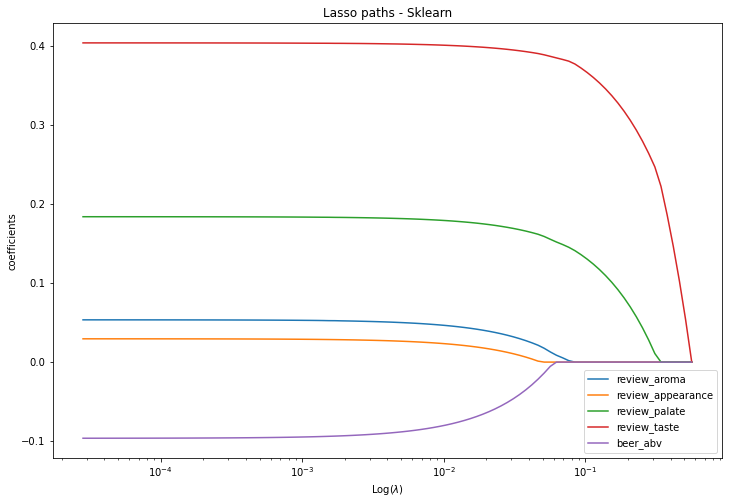

In [29]:
variables = ['review_aroma','review_appearance','review_palate','review_taste','beer_abv']
data_subset = data.loc[:, variables + ['review_overall']]
data_subset.dropna(inplace=True)

X = data_subset.loc[:,variables]
X = preprocessing.scale(X) #Standardize a dataset along any axis.
y = np.array(data_subset.review_overall)

alphas_lasso, coefs_lasso, _ = lasso_path(X, y, eps = 5e-5)

# Display results
plt.figure(figsize = (12,8))

for i in range(X.shape[1]):
    plt.plot(alphas_lasso, coefs_lasso[i], label = variables[i])

plt.xscale('log')
plt.xlabel('Log($\\lambda$)')
plt.ylabel('coefficients')
plt.title('Lasso paths - Sklearn')
plt.legend()
plt.axis('tight')

<h3>XGBoost<h3>

In [30]:
#pip install xgboost

In [31]:
import xgboost
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [32]:
#XGB
#Defining the independent variables and dependent variables
variables = ['review_aroma','review_appearance','review_palate','review_taste','beer_abv']
x = data.loc[:,variables]
y = data['review_overall']
#Getting Test and Training Set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=333)


In [33]:
model = xgboost.XGBRegressor(n_estimators=10, verbosity=1)
model.fit(x_train, y_train)

y_test_pred = model.predict(x_test)
print("R^2 score is: {0: .4f}".format(r2_score(y_test, y_test_pred)))
print("RMSE is: {0: .4f}".format(np.sqrt(mean_squared_error(y_test, y_test_pred))))

R^2 score is:  0.6650
RMSE is:  0.4163


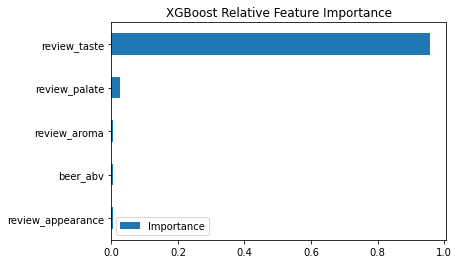

In [34]:
# Plot feature importance
featureImport = pd.DataFrame(model.feature_importances_, index=variables)
featureImport.columns = ["Importance"]
featureImport.sort_values(["Importance"], ascending=True).plot(kind="barh")
plt.title("XGBoost Relative Feature Importance")
plt.show()

<div class="alert alert-block alert-success">
<b>Answer 3:</b> Based on review through methods Regression / Lasso / XGBoost we can say that the biggest influence on overall score has<b>"taste"</b>, second position is "palate".

</div>

___

In [35]:
#założenie do zadania: Z uwagi że w tabelach mamy subiektywne oceny poszczególnych parametrów a nie nie fizyczne cechy
#zakładam że średnia (w ramach stylu) średnich ocena zapachu i wyglądu w ramach konkretnych piw
#reprezentuje najlepszego przedstawiciela gatunku
#będziemy szukać piwa któremu najbliżej jest do tych parametrów 

In [36]:
agg = data.groupby(by=(['beer_style','unique_name']))[['review_aroma','review_appearance']].mean().reset_index()

In [37]:
agg

,beer_style,unique_name,review_aroma,review_appearance
0,Altbier,(512) Brewing Company - (512) Alt,3.818182,3.772727
1,Altbier,1516 Brewing Company - Yankee Sticke,5.000000,4.500000
2,Altbier,21st Amendment Brewery - Rathskeller Alt,3.000000,3.500000
3,Altbier,3 Ravens Brewing - 3 Ravens Blond,3.550000,3.450000
4,Altbier,3 Ravens Brewing - 3 Ravens Über Blond Sticke ...,3.357143,3.714286
...,...,...,...,...
65738,Witbier,Zerodegrees Cardiff - Belgian Wheat,2.500000,2.500000
65739,Witbier,À La Fût - Mékinoise,3.500000,3.000000
65740,Witbier,À l’abri de la Tempête - Le Vieux Couvent,3.875000,3.625000
65741,Witbier,Ölvisholt Brugghús - Fósturlandsins Freyja,4.000000,2.500000


In [38]:
agg2 = agg.groupby(by='beer_style')[['review_aroma','review_appearance']].mean().reset_index()

In [39]:
agg2

,beer_style,review_aroma,review_appearance
0,Altbier,3.569488,3.795608
1,American Adjunct Lager,2.527113,2.856156
2,American Amber / Red Ale,3.444117,3.677405
3,American Amber / Red Lager,3.226749,3.526607
4,American Barleywine,3.923683,3.927848
...,...,...,...
99,Vienna Lager,3.317849,3.593551
100,Weizenbock,3.830999,3.790213
101,Wheatwine,3.926575,3.923091
102,Winter Warmer,3.681912,3.780143


In [40]:
from sklearn.neighbors import KNeighborsClassifier

In [41]:
model = KNeighborsClassifier(n_neighbors = 1)

In [42]:
summary=[]
for style in agg2['beer_style'].to_list():
    x_train = agg[['review_aroma','review_appearance']].loc[agg['beer_style']==style]
    y_train = agg['unique_name'].loc[agg['beer_style']==style]
    x_to_find = agg2.loc[agg2['beer_style']==style][['review_aroma','review_appearance']]
    model.fit(x_train,y_train)
    summary.append([style, model.predict(x_to_find)[0]])
pd.DataFrame(summary, columns=['beer_style','best_example'])    
        

,beer_style,best_example
0,Altbier,Rio Salado Brewing Company - Rio Salado Autumn...
1,American Adjunct Lager,Saigon Beer Company - Saigon Export
2,American Amber / Red Ale,Weyerbacher Brewing Co. - Autumn Fest
3,American Amber / Red Lager,Brick Brewing Co. / Red Baron Lounge - J.R. Br...
4,American Barleywine,Steffans Aldergrove Brewery - Auld Persnickety...
...,...,...
99,Vienna Lager,Trader Joe's Brewing Company - Trader Joe's Vi...
100,Weizenbock,Weissbierbrauerei Hopf - Hopf Weisser Bock
101,Wheatwine,New Holland Brewing Company - New Holland Pilg...
102,Winter Warmer,Cascade Lakes Brewing Co. - Santa's Little Helper


<div class="alert alert-block alert-success">
<b>Answer 4</b>: Table above suggest the best representant in frame of particular styles
</div>